# LSTM - Time Series

In [1]:
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

from utils import *

In [2]:
data = pd.read_csv("order_data.csv")
data.head()

,Date,TimeOfDay,MenuItem,Quantity
0,2023-01-01,07:00,Chicken Tikka Masala,2
1,2023-01-01,07:00,Shrimp Scampi,2
2,2023-01-01,07:00,Chicken Alfredo,3
3,2023-01-01,07:00,Caesar Salad,1
4,2023-01-01,07:00,Tiramisu,3


In [3]:
def extract_hour(timestamp):
    time_obj = datetime.strptime(timestamp, '%H:%M')
    return time_obj.hour

# Applying the function to the 'TimeofDay' column to extract hours
data['TimeOfDay'] = data['TimeOfDay'].apply(extract_hour)

In [4]:
# Convert 'Date' column to datetime format and 'TimeOfDay' to timedelta format
data['DateTime'] = pd.to_datetime(data['Date']) + pd.to_timedelta(data['TimeOfDay'], unit='h')

In [5]:
# Convert 'Date' column to numeric representation
data['Date'] = pd.to_datetime(data['Date'])
start_date = data['Date'].min()
data['NumericDate'] = (data['Date'] - start_date).dt.days + 1

In [6]:
data = data.groupby(['DateTime', 'Date', 'NumericDate', 'MenuItem', 'TimeOfDay']).agg({'Quantity': 'sum'}).reset_index()
data.head(5)
# Sort the DataFrame by multiple columns
data.sort_values(by=['NumericDate', 'MenuItem', 'TimeOfDay'], inplace=True)


In [7]:
categorical_columns = ['MenuItem']
data = encodeLabels(data, categorical_columns)
data.head()

,DateTime,Date,NumericDate,MenuItem,TimeOfDay,Quantity
0,2023-01-01 07:00:00,2023-01-01,1,1,7,5
10,2023-01-01 08:00:00,2023-01-01,1,1,8,5
20,2023-01-01 09:00:00,2023-01-01,1,1,9,3
30,2023-01-01 10:00:00,2023-01-01,1,1,10,14
40,2023-01-01 11:00:00,2023-01-01,1,1,11,15


In [8]:
n_features = 3
epochs = 25
batch_size = 32

In [9]:
X, y = create_sequence(data)

X_reshaped = X.reshape(X.shape[0], X.shape[1], n_features)

In [10]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.4, shuffle=False)

In [11]:

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)


2023-11-26 20:58:28.483883: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-11-26 20:58:28.483908: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-11-26 20:58:28.483914: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-11-26 20:58:28.483950: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-26 20:58:28.483965: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/25


2023-11-26 20:58:29.473644: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-26 20:58:29.688281: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-26 20:58:29.753347: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-26 20:58:29.868772: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  5/752 [..............................] - ETA: 11s - loss: 145.2747  

2023-11-26 20:58:29.980365: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


752/752 [==============================] - 12s 14ms/step - loss: 60.2455
Epoch 2/25
752/752 [==============================] - 10s 13ms/step - loss: 52.8862
Epoch 3/25
752/752 [==============================] - 10s 14ms/step - loss: 50.5233
Epoch 4/25
752/752 [==============================] - 10s 14ms/step - loss: 48.5217
Epoch 5/25
752/752 [==============================] - 10s 13ms/step - loss: 48.2551
Epoch 6/25
752/752 [==============================] - 10s 13ms/step - loss: 46.3697
Epoch 7/25
752/752 [==============================] - 10s 14ms/step - loss: 46.0765
Epoch 8/25
752/752 [==============================] - 10s 14ms/step - loss: 45.4631
Epoch 9/25
752/752 [==============================] - 10s 14ms/step - loss: 44.3522
Epoch 10/25
752/752 [==============================] - 10s 14ms/step - loss: 41.6685
Epoch 11/25
752/752 [==============================] - 10s 14ms/step - loss: 40.6664
Epoch 12/25
752/752 [==============================] - 10s 14ms/step - loss: 39.1915


In [17]:
predictions = model.predict(X_test)

501/501 [==============================] - 2s 5ms/step


In [18]:
evaluate(model, predictions, X_test, y_test, True)

501/501 [==============================] - 3s 6ms/step - loss: 7.7725
Model Performance
Score: 7.77250862121582
Mean Squared Error (MSE): 7.7725068668946715
Root Mean Squared Error (RMSE): 2.7879216034341194
Mean Absolute Error (MAE): 2.167767821224648
R-squared (R2): 0.8668005814879898


In [19]:
# Save the model
model.save("lstm_time-series_model.keras")

In [20]:
# Day 201, Menu Item 5
test_X = X_test[0:12]
test_y = y_test[0:12]

# Make predictions
test_pred = model.predict(test_X)

1/1 [==============================] - 0s 16ms/step


In [21]:
time = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

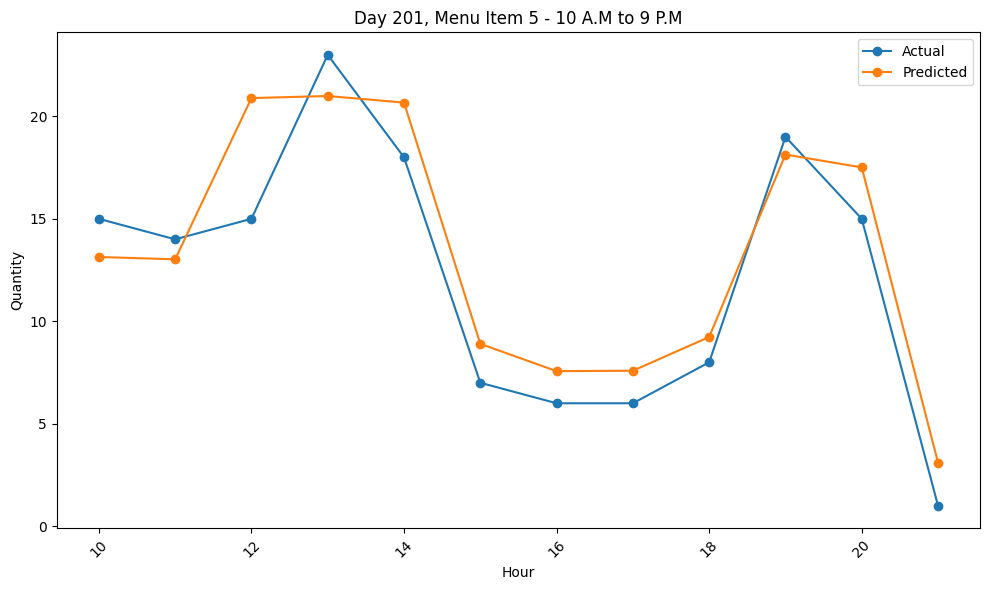

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10, 6))
plt.plot(time, test_y, marker='o', linestyle='-', label='Actual')
plt.plot(time, test_pred, marker='o', linestyle='-', label='Predicted')
plt.xlabel('Hour')
plt.ylabel('Quantity')
plt.title(f'Day 201, Menu Item 5 - 10 A.M to 9 P.M')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
